In [5]:
conda install -c conda-forge tensorflow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [37]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

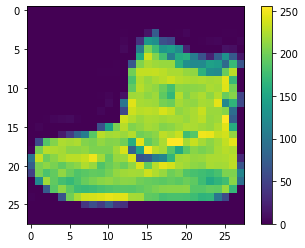

In [9]:
#pixel values fall in the range of 0 to 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#Scale these values to a range of 0 to 1 
train_images = train_images / 255.0

test_images = test_images / 255.0

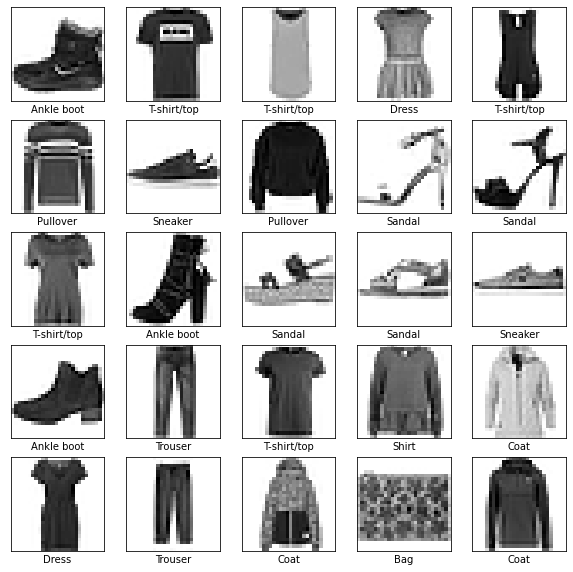

In [12]:
#to verify, display first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
#building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
#training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1.0846 - acc: 0.6689
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6383 - acc: 0.7698
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5634 - acc: 0.7976
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5215 - acc: 0.8148
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.4944 - acc: 0.8257
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4751 - acc: 0.8328
Epoch 7/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4605 - acc: 0.8380
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4486 - acc: 0.8422
Epoch 9/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4388 - acc: 0.8457
Epoch 10/10
60000/60000 [==============================] - 2s 27us/sample - loss: 

In [21]:
#testing
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.4590 - acc: 0.8366

Test accuracy: 0.8366


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([3.9652241e-07, 9.4696189e-09, 3.1507955e-06, 4.1796625e-06,
       6.1538799e-06, 2.2347662e-01, 9.8100145e-06, 3.3368289e-01,
       6.0279430e-03, 4.3678874e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

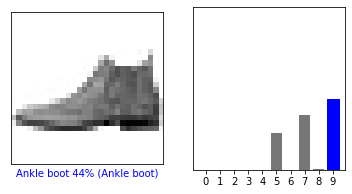

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

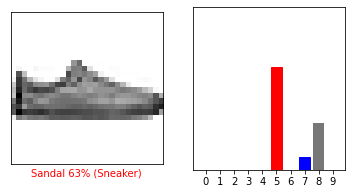

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

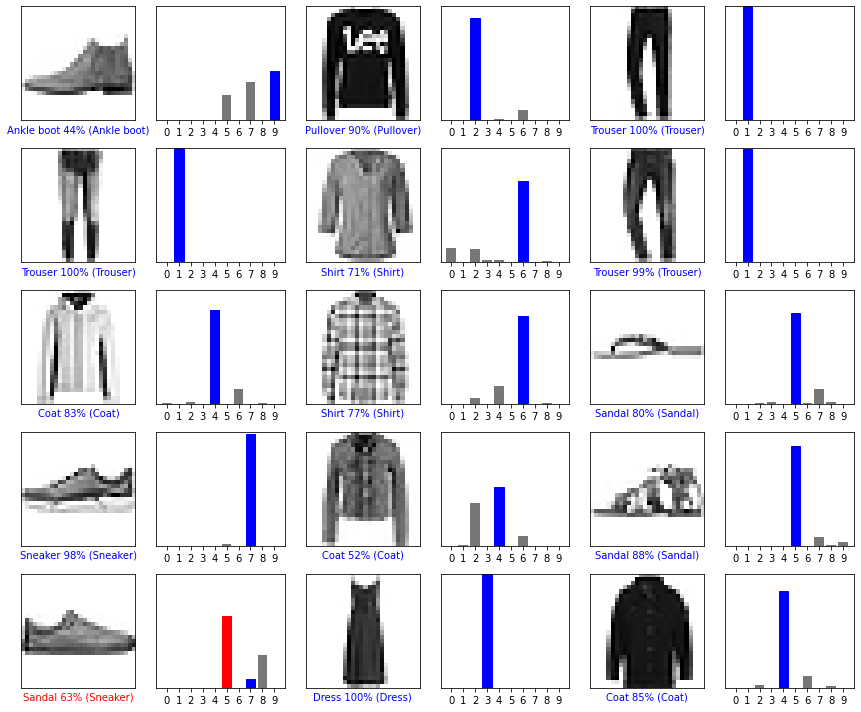

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.2522285e-04 5.5170785e-06 8.9598924e-01 9.7629862e-05 1.4031310e-02
  1.2934415e-09 8.9317322e-02 5.0548881e-15 2.3370188e-04 3.6137243e-11]]


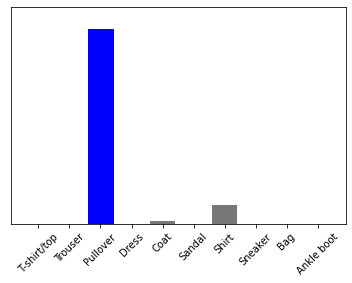

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2

# Digits dataset

In [42]:
(train_images1, train_labels1), (test_images1, test_labels1) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [43]:
train_images1.shape

(60000, 28, 28)

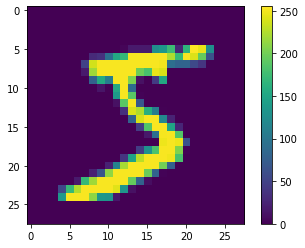

In [44]:
plt.figure()
plt.imshow(train_images1[0])
plt.colorbar()
plt.grid(False)
plt.show()